## Challenge Overview
Your goal is to generate a network that is as close as possible to the original real network. You do not have the original network in the explicit view, but you know some of its statistics. All statistics are in stats.txt file that contains a dictionary of the form
* number_nodes (number of nodes): value
* number_cc (number of connected components): value, sigma
* radius (radius of giant component): value, sigma
* diameter (diameter of giant component): value, sigma
* average_clustering (average clustering coefficient): value, sigma
* average_path_length (average path length): value, sigma
* degree_cdf (empirical CDF of degree distribution): values, probabilities

Meaning of all these sigmas is described in Evaluation section. 

You can use this code to draw CDF:
````
q_seq, p_seq = stats['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()````

In [1]:
import pandas as pd
import json
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib inline

In [2]:
with open('stats.txt', 'r') as file:
    data = json.load(file)
    for key in data:
        print(key, data[key])

number_nodes 1882
radius [15, 2]
diameter [28, 4]
average_clustering [0.005066798238955518, 0.001]
average_path_length [11.748410823170731, 2]
number_cc [168, 32]
degree_cdf [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 24, 46], [0.0, 0.6902231668437833, 0.8517534537725824, 0.9086078639744952, 0.9378320935175345, 0.9516471838469713, 0.9654622741764081, 0.9723698193411264, 0.9776833156216791, 0.9808714133900106, 0.9845908607863975, 0.9888416578108395, 0.9893730074388948, 0.9925611052072264, 0.9936238044633369, 0.9952178533475027, 0.9957492029755579, 0.9968119022316685, 0.997874601487779, 0.9989373007438895, 0.9994686503719448, 1.0]]


In [3]:
def make_graph(data):
    G = nx.Graph()
    nodes = np.arange(data['number_nodes'])
    G.add_nodes_from(nodes)
    return G

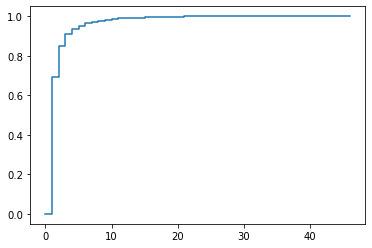

In [4]:
q_seq, p_seq = data['degree_cdf']
plt.plot(
    np.append(np.repeat(q_seq, 2)[1:], q_seq[-1]), 
    np.repeat(p_seq, 2)
)
plt.show()

## тут явно выполняется power law

In [5]:
g = make_graph(data)

In [6]:
df = pd.DataFrame(data).T
df.columns = ['value', 'sigma']
df

,value,sigma
number_nodes,1882,1882
radius,15,2
diameter,28,4
average_clustering,0.005067,0.001
average_path_length,11.748411,2.0
number_cc,168,32
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ..."


In [7]:
def calc_results(graph_list, df):
    for G in tqdm(graph_list):
        res = {}
        res['number_nodes'] = nx.number_of_nodes(G)
        res['number_cc'] = len(list(nx.connected_components(G)))
        largest_cc = G.subgraph(max(nx.connected_components(G), key=len))
        res['radius'] = nx.radius(largest_cc)
        res['diameter'] = nx.diameter(largest_cc)
        res['average_path_length'] = nx.average_shortest_path_length(largest_cc)
        res['average_clustering'] = nx.average_clustering(G)
        distr = pd.Series([x[1] for x in G.degree]).value_counts().sort_index()
        distr = distr.cumsum() / distr.sum()
        res['degree_cdf'] = distr
        res = pd.Series(res)
        df = pd.concat([df, res], axis = 1)
    return df

In [8]:
## test barabasi_albert_graph
g1 = nx.barabasi_albert_graph(data['number_nodes'], 1)
g2 = nx.barabasi_albert_graph(data['number_nodes'], 2)
g3 = nx.barabasi_albert_graph(data['number_nodes'], 3)
g4 = nx.barabasi_albert_graph(data['number_nodes'], 4)
calc_results([g1, g2, g3, g4], df)

  0%|          | 0/4 [00:00<?, ?it/s]

,value,sigma,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882
radius,15,2,9,5,4,4
diameter,28,4,18,8,6,5
average_clustering,0.005067,0.001,0.0,0.018083,0.0175,0.02346
average_path_length,11.748411,2.0,8.193914,4.426723,3.697007,3.387798
number_cc,168,32,1,1,1,1
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.662593 2 0.826249 3 0.901700 4...,2 0.492561 3 0.699256 4 0.792242 5...,3 0.386291 4 0.599894 5 0.71200...,4 0.312965 5 0.520723 6 0.64505...


In [9]:
len(list(nx.connected_components(g)))

1882

In [10]:
g = nx.barabasi_albert_graph(data['number_nodes'], 1)
distr = pd.Series([x[1] for x in g.degree]).value_counts().sort_index()
distr = distr.cumsum() / distr.sum() 
distr

1     0.675877
2     0.837407
3     0.895855
4     0.932519
5     0.949522
6     0.961743
7     0.972901
8     0.977152
9     0.982465
10    0.984591
11    0.987779
12    0.989904
13    0.990436
14    0.992030
15    0.992561
18    0.993092
19    0.993624
22    0.994155
23    0.994687
24    0.995218
25    0.996281
27    0.996812
28    0.997343
31    0.997875
38    0.998406
44    0.998937
47    0.999469
82    1.000000
dtype: float64

## baseline #1
````barabasi_albert_graph(data['number_nodes'], 1)````

In [11]:
with open('barabasi_albert_graph_1.txt', 'w') as f:
    for x in list(g.edges()):
        f.write(f"{x[0]} {x[1]}\n")

### Improve baseline by adding the correct number of components

In [12]:
import random

def random_barabasi(z):
    g = nx.Graph()
    n = 1882
    sizes = []
    m = data['number_cc'][0]
    for i in range(m - 1):
        k = random.randint(2, n - 2 * (m - i) - 1)
        sizes.append(k)
        n -= k

    sizes.append(n)


    for i in sizes: 
        n = nx.number_of_nodes(g)
        G = nx.barabasi_albert_graph(i, min(i-1, z))
        labels = {
            k:  n + k for k in range(i)
        }
        G = nx.relabel_nodes(G, labels)
        g = nx.union(G, g)
    return g

In [13]:
calc_results([g1, random_barabasi(1), random_barabasi(2)], df)

  0%|          | 0/3 [00:00<?, ?it/s]

,value,sigma,0,0,0
number_nodes,1882,1882,1882,1882,1882
radius,15,2,9,8,5
diameter,28,4,18,15,7
average_clustering,0.005067,0.001,0.0,0.0,0.032064
average_path_length,11.748411,2.0,8.193914,6.426925,4.234719
number_cc,168,32,1,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.662593 2 0.826249 3 0.901700 4...,1 0.726886 2 0.859724 3 0.909671 4...,1 0.173220 2 0.591392 3 0.755579 4...


In [14]:
with open('barabasi_albert_graph_1_168.txt', 'w') as f:
    for x in list(random_barabasi(1).edges()):
        f.write(f"{x[0]} {x[1]}\n")

In [202]:
#path 2 random edge removal

In [15]:
g = random_barabasi(2)

In [16]:
def bar_rem(k, l):
    g = random_barabasi(k)
    for i in range(l):
        E = list(g.edges)
        e = random.choice(E)
        if (g.degree(e[0]) > 1) and (g.degree(e[1]) > 1):
            g.remove_edge(e[0], e[1])
            if len(list(nx.connected_components(g))) > 168:
                g.add_edge(e[0], e[1])
    return g

def bar_add(k, l):
    g = random_barabasi(k)
    for i in range(l):
        e = random.choice
        E = list(g.edges)
        e = random.choice(E)
        if (g.degree(e[0]) > 1) and (g.degree(e[1]) > 1):
            g.remove_edge(e[0], e[1])
            if len(list(nx.connected_components(g))) > 168:
                g.add_edge(e[0], e[1])
    return g

In [17]:
calc_results([random_barabasi(1), bar_rem(2, 3000), bar_rem(3, 4000), bar_rem(3, 4500), bar_rem(3, 5000)], df)

  0%|          | 0/5 [00:00<?, ?it/s]

,value,sigma,0,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882,1882
radius,15,2,8,14,13,15,18
diameter,28,4,16,28,22,28,36
average_clustering,0.005067,0.001,0.0,0.001154,0.004315,0.000855,0.0
average_path_length,11.748411,2.0,7.269817,9.286817,8.078724,10.65185,11.45103
number_cc,168,32,168,168,168,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.723698 2 0.859724 3 0.914453 4...,1 0.624867 2 0.832625 3 0.916578 4...,1 0.585016 2 0.812965 3 0.901169 4...,1 0.595112 2 0.819872 3 0.907014 4...,1 0.606801 2 0.826780 3 0.916047 4...


In [18]:
g0, g1, g2, g3 = bar_rem(2, 3000), bar_rem(2, 3100), bar_rem(2, 3250), bar_rem(2, 3400)
calc_results([g0, g1, g2, g3], df)

  0%|          | 0/4 [00:00<?, ?it/s]

,value,sigma,0,0,0,0
number_nodes,1882,1882,1882,1882,1882,1882
radius,15,2,15,23,15,16
diameter,28,4,29,46,29,31
average_clustering,0.005067,0.001,0.00054,0.000702,0.001154,0.000941
average_path_length,11.748411,2.0,9.671195,14.882231,10.584332,12.181861
number_cc,168,32,168,168,168,168
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ...",1 0.624867 2 0.853348 3 0.920298 4...,1 0.634431 2 0.852285 3 0.915515 4...,1 0.633900 2 0.839532 3 0.914453 4...,1 0.637088 2 0.846440 3 0.918704 4...


In [22]:
with open('bar_rem_graph_sub1.txt', 'w') as f:
    for x in list(g0.edges()):
        f.write(f"{x[0]} {x[1]}\n")

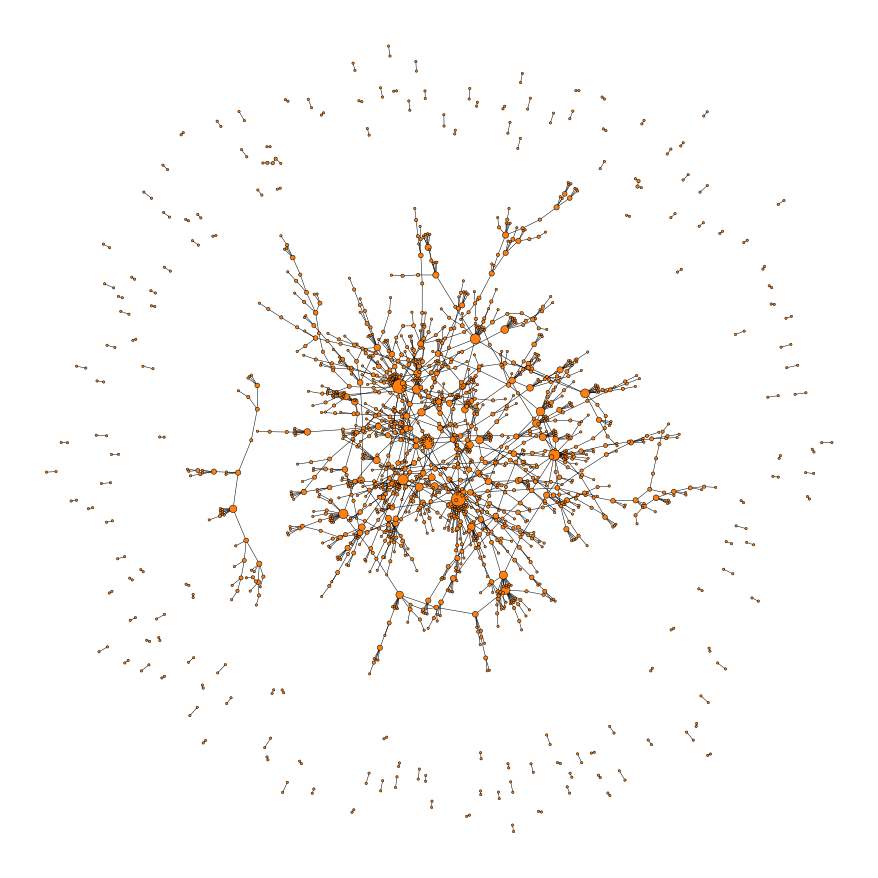

In [20]:
plt.rcParams["figure.figsize"] = (12, 12)
sizes = np.array(list(nx.degree_centrality(g1).values()))
sizes = sizes / max(sizes) * 200
nx.draw(
    g1,
    pos = nx.layout.spring_layout(g1),
    with_labels=False, 
    node_size=sizes, 
    width=0.5,
    linewidths=0.5,
    edgecolors='black',
    node_color='tab:orange'
)

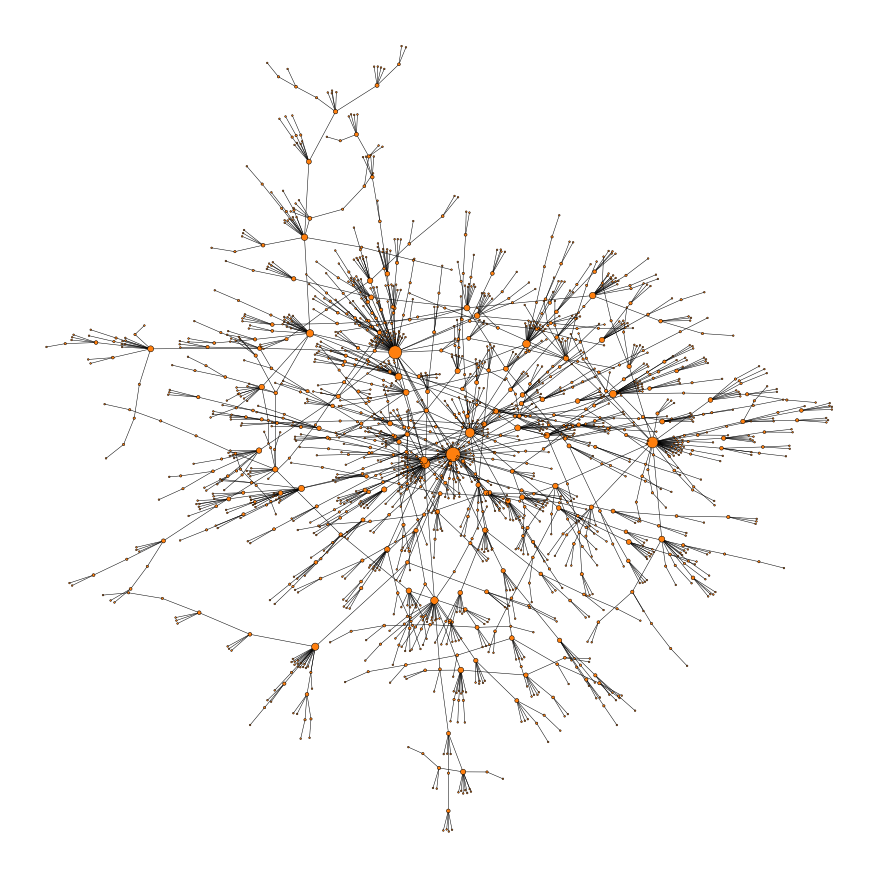

In [21]:
gb = nx.barabasi_albert_graph(data['number_nodes'], 1)
plt.rcParams["figure.figsize"] = (12, 12)
sizes = np.array(list(nx.degree_centrality(gb).values()))
sizes = sizes / max(sizes) * 200
nx.draw(
    gb,
    pos = nx.layout.spring_layout(gb),
    with_labels=False, 
    node_size=sizes, 
    width=0.5,
    linewidths=0.5,
    edgecolors='black',
    node_color='tab:orange'
)

In [23]:
df


,value,sigma
number_nodes,1882,1882
radius,15,2
diameter,28,4
average_clustering,0.005067,0.001
average_path_length,11.748411,2.0
number_cc,168,32
degree_cdf,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.0, 0.6902231668437833, 0.8517534537725824, ..."
